In [1]:
import h2o 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/alchemist/.conda/envs/tensorflow/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpug_mx4du
  JVM stdout: /tmp/tmpug_mx4du/h2o_alchemist_started_from_python.out
  JVM stderr: /tmp/tmpug_mx4du/h2o_alchemist_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.23.0.4597
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_alchemist_uv1d5s
H2O cluster total nodes:,1
H2O cluster free memory:,1.280 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
train, test = iris.split_frame([0.8],seed =123)

In [5]:
train.nrow

121

In [10]:
x = ["sepal_len","sepal_wid","petal_len","petal_wid"]

In [11]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [12]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden = [4],
    activation = "Tanh",
    epochs = 300,    
    model_id ="m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,    
)
%time m_AE_4.train(x,None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 274 ms, sys: 30.8 ms, total: 305 ms
Wall time: 6.01 s


In [13]:
sh = m_AE_4.score_history()
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2019-03-16 10:56:23,0.258 sec,0.00000 obs/sec,0.0,0,0.0,0.429160,0.184179
1,,2019-03-16 10:56:23,0.379 sec,1025 obs/sec,1.0,1,121.0,0.327844,0.107482
2,,2019-03-16 10:56:23,0.401 sec,1805 obs/sec,2.0,2,242.0,0.265475,0.070477
3,,2019-03-16 10:56:23,0.440 sec,2160 obs/sec,3.0,3,363.0,0.215377,0.046387
4,,2019-03-16 10:56:23,0.457 sec,2674 obs/sec,4.0,4,484.0,0.176590,0.031184


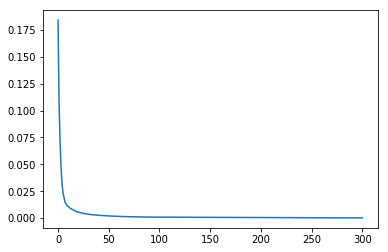

In [14]:
sh["training_mse"].plot()

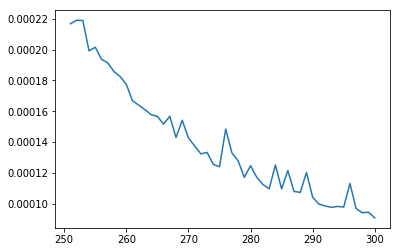

In [15]:
sh["training_mse"].tail(50).plot()

In [16]:
m_AE_4_2 = H2OAutoEncoderEstimator(
    hidden = [4],
    activation = "Tanh",
    epochs = 300,    
    model_id ="m_AE_4_2",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,    
    stopping_rounds = 15
)
%time m_AE_4_2.train(x,None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 224 ms, sys: 20.6 ms, total: 245 ms
Wall time: 2.81 s


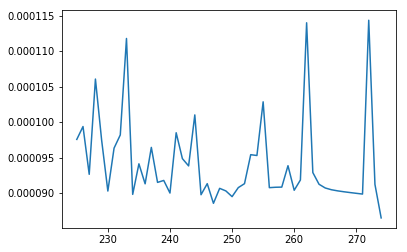

In [17]:
she = m_AE_4_2.score_history()
she["training_mse"].tail(50).plot()

In [18]:
m_AE_3 = H2OAutoEncoderEstimator(
    hidden = [3], #only change
    activation = "Tanh",
    epochs = 300,    
    model_id ="m_AE_3",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,    
    stopping_rounds = 15
)
%time m_AE_3.train(x,None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 241 ms, sys: 14.1 ms, total: 255 ms
Wall time: 2.75 s


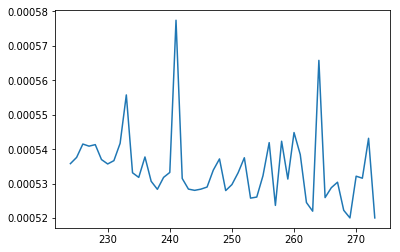

In [19]:
sh = m_AE_3.score_history()
sh["training_mse"].tail(50).plot()

In [20]:
m_AE_2 = H2OAutoEncoderEstimator(
    hidden = [2], #only change
    activation = "Tanh",
    epochs = 300,    
    model_id ="m_AE_2",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,    
    stopping_rounds = 15
)
%time m_AE_2.train(x,None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 74.1 ms, sys: 2.65 ms, total: 76.7 ms
Wall time: 1.34 s


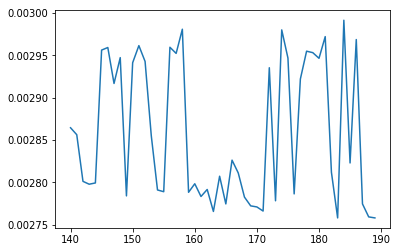

In [21]:
sh = m_AE_2.score_history()
sh["training_mse"].tail(50).plot()

In [23]:
m_AE_1 = H2OAutoEncoderEstimator(
    hidden = [1], #only change
    activation = "Tanh",
    epochs = 300,    
    model_id ="m_AE_1",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,    
    stopping_rounds = 15
)
%time m_AE_1.train(x,None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 99.1 ms, sys: 8.97 ms, total: 108 ms
Wall time: 1.11 s


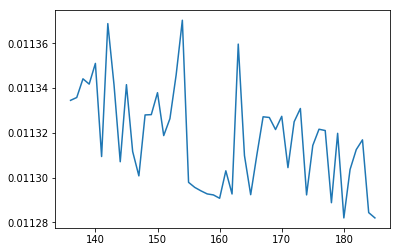

In [24]:
sh = m_AE_1.score_history()
sh["training_mse"].tail(50).plot()

## Multi-layer autoencoder

In [35]:
m_AE_5_3_5 = H2OAutoEncoderEstimator(
    hidden = [5,3,5], #only change
    activation = "Tanh",
    epochs = 300,    
    model_id ="m_AE_5_3_5",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,    
    stopping_rounds = 15
)
%time m_AE_5_3_5.train(x,None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 79.7 ms, sys: 4.27 ms, total: 84 ms
Wall time: 889 ms


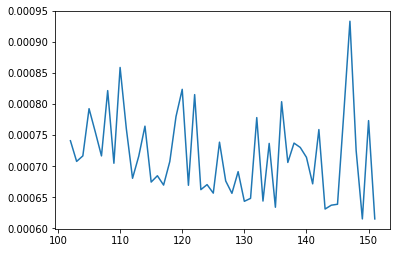

In [36]:
sh = m_AE_5_3_5.score_history()
sh["training_mse"].tail(50).plot()

# Stacked autoencoder
### Builds on the m_AE_3 model, that was made earlier

In [37]:
train_AE_3 = m_AE_3.deepfeatures(train,0) #0 means layer 1

deepfeatures progress: |██████████████████████████████████████████████████| 100%


In [38]:
train_AE_3.dim

[121, 3]

In [39]:
train_AE_3

DF.L1.C1,DF.L1.C2,DF.L1.C3
0.330472,-0.0602823,-0.555024
0.349059,-0.257044,-0.499892
0.401021,-0.164724,-0.507552
0.410044,-0.196614,-0.478704
0.35553,-0.011058,-0.555688
0.288035,0.141804,-0.533
0.431278,-0.0499041,-0.479524
0.343314,-0.0949304,-0.534079
0.272929,0.00877359,-0.585222
0.380577,-0.0806065,-0.513164


In [40]:
m_AE_3x3 = H2OAutoEncoderEstimator(
    hidden = [3], #only change
    activation = "Tanh",
    epochs = 300,    
    model_id ="m_AE_3x3",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,    
    stopping_rounds = 15
)
%time m_AE_3x3.train([0,1,2],None, train_AE_3)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 80.2 ms, sys: 1.65 ms, total: 81.8 ms
Wall time: 932 ms


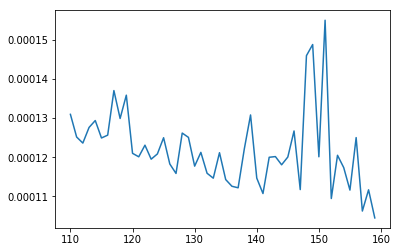

In [41]:
sh = m_AE_3x3.score_history()
sh["training_mse"].tail(50).plot()

In [42]:
x = ["sepal_len","sepal_wid","petal_len","petal_wid","class"]

In [44]:
m_anomaly16 = H2OAutoEncoderEstimator(
    hidden = [16],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_anomaly16",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,    
    stopping_rounds = 15
)
%time m_anomaly16.train(x,None, iris)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 82.1 ms, sys: 7.63 ms, total: 89.8 ms
Wall time: 1.3 s


In [45]:
anomalies = m_anomaly16.anomaly(iris).cbind(iris).as_data_frame()

In [46]:
s = anomalies.sort_values("Reconstruction.MSE", ascending= False)

In [47]:
s.head()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
131,0.000397,7.9,3.8,6.4,2.0,Iris-virginica
118,0.000313,7.7,2.6,6.9,2.3,Iris-virginica
15,0.000312,5.7,4.4,1.5,0.4,Iris-setosa
43,0.000256,5.0,3.5,1.6,0.6,Iris-setosa
135,0.000253,7.7,3.0,6.1,2.3,Iris-virginica


In [48]:
s.tail()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
27,0.000005,5.2,3.5,1.5,0.2,Iris-setosa
7,0.000003,5.0,3.4,1.5,0.2,Iris-setosa
92,0.000003,5.8,2.6,4.0,1.2,Iris-versicolor
0,0.000002,5.1,3.5,1.4,0.2,Iris-setosa
4,0.000001,5.0,3.6,1.4,0.2,Iris-setosa
